In [1]:

import re
import os
import pathlib
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()



# Experiment constants
exp_name = "01_http_max_throughput"
file_prefix = "exp-01"

In [2]:
"""Load cleaned/aggregated data sets

resource_df -> CPU/Mem utilization for experiments
fortio_df -> Load test results from fortio
"""

# resource_df = pd.read_feather(data_dir / "resource_results.feather")
fortio_df = pd.read_feather(data_dir / "fortio_results.feather")

In [3]:
"""
Prepares the experiment data

"""


exp = fortio_df[fortio_df["experiment"] == exp_name]
exp = exp.drop("actual_qps", 1)
exp = exp.explode("latency")
exp = exp.reset_index(drop=True)
exp = exp.astype({
    "experiment": "category",
    "mesh": "category",
    "requested_qps": "category",
    "payload": "category",
    "protocol": "category",
    "latency": np.float64,
})
exp = exp.sort_values("mesh", ascending=True)


exp.head()

,experiment,mesh,requested_qps,protocol,payload,latency
39588490,01_http_max_throughput,Baseline,MAX,http,0,1.260004
41873570,01_http_max_throughput,Baseline,MAX,http,0,1.494196
41873569,01_http_max_throughput,Baseline,MAX,http,0,1.552722
41873568,01_http_max_throughput,Baseline,MAX,http,0,1.545147
41873567,01_http_max_throughput,Baseline,MAX,http,0,1.533766


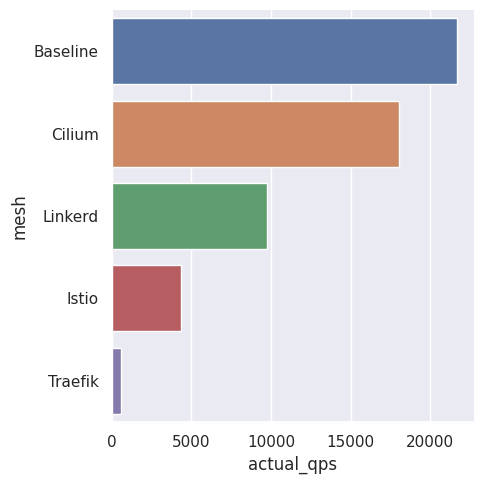

In [5]:
data =  fortio_df[fortio_df["experiment"] == exp_name]
data = data.sort_values("actual_qps", ascending=False)
g = sns.catplot(data=data, x="actual_qps", y="mesh", kind=)

In [27]:
# The quantiles to plot
quantiles = [
    0.99,
    0.999,
    0.9999
]
data = exp.groupby("mesh")["latency"].quantile(quantiles).unstack()
data.head()


,0.9900,0.9990,0.9999
mesh,,,
Baseline,7.420944,12.984117,36.843162
Cilium,8.204485,15.375398,47.068528
Istio,39.812424,140.991590,358.050838
Linkerd,13.891167,35.944824,98.307628
Traefik,190.890326,253.134498,326.176362


In [29]:
d = data.melt(ignore_index=False, value_vars=quantiles, var_name="quantile", value_name="latency")
d

,quantile,latency
mesh,,
Baseline,0.9900,7.420944
Cilium,0.9900,8.204485
Istio,0.9900,39.812424
Linkerd,0.9900,13.891167
Traefik,0.9900,190.890326
Baseline,0.9990,12.984117
Cilium,0.9990,15.375398
Istio,0.9990,140.991590
Linkerd,0.9990,35.944824


In [34]:
d2 = d.reset_index()
d2.head()

,mesh,quantile,latency
0,Baseline,0.99,7.420944
1,Cilium,0.99,8.204485
2,Istio,0.99,39.812424
3,Linkerd,0.99,13.891167
4,Traefik,0.99,190.890326


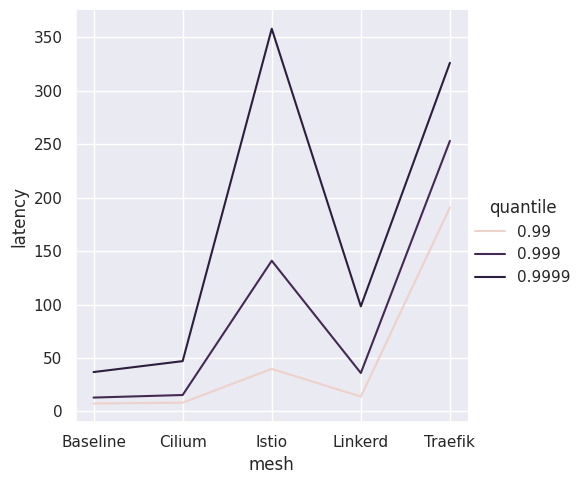

In [37]:


sns.relplot(data=d2, x="mesh", y="latency", hue="quantile", kind="line")